In [1]:
# Libraries to import
import pandas as pd
import numpy as np

import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#Dataset to import
datafile = pd.read_csv("Marketing_data.csv")

In [3]:
df = datafile.copy()

In [4]:
# Datafile exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Since the number of missing values are very less, so we will remove them.
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
# Extrating the customer who mde oneoff_purchase of 40761.25
df[df.ONEOFF_PURCHASES==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [11]:
df[df['CASH_ADVANCE']==47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [12]:
# To check for duplicate value
df.duplicated().sum()

0

In [13]:
# Dropping of unnecessary column
df.drop("CUST_ID", axis = 1, inplace = True)

F:\SOFTWARES\Installed files\PYTHON\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\SOFTWARES\Installed files\PYTHON\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\SOFTWARES\Installed files\PYTHON\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

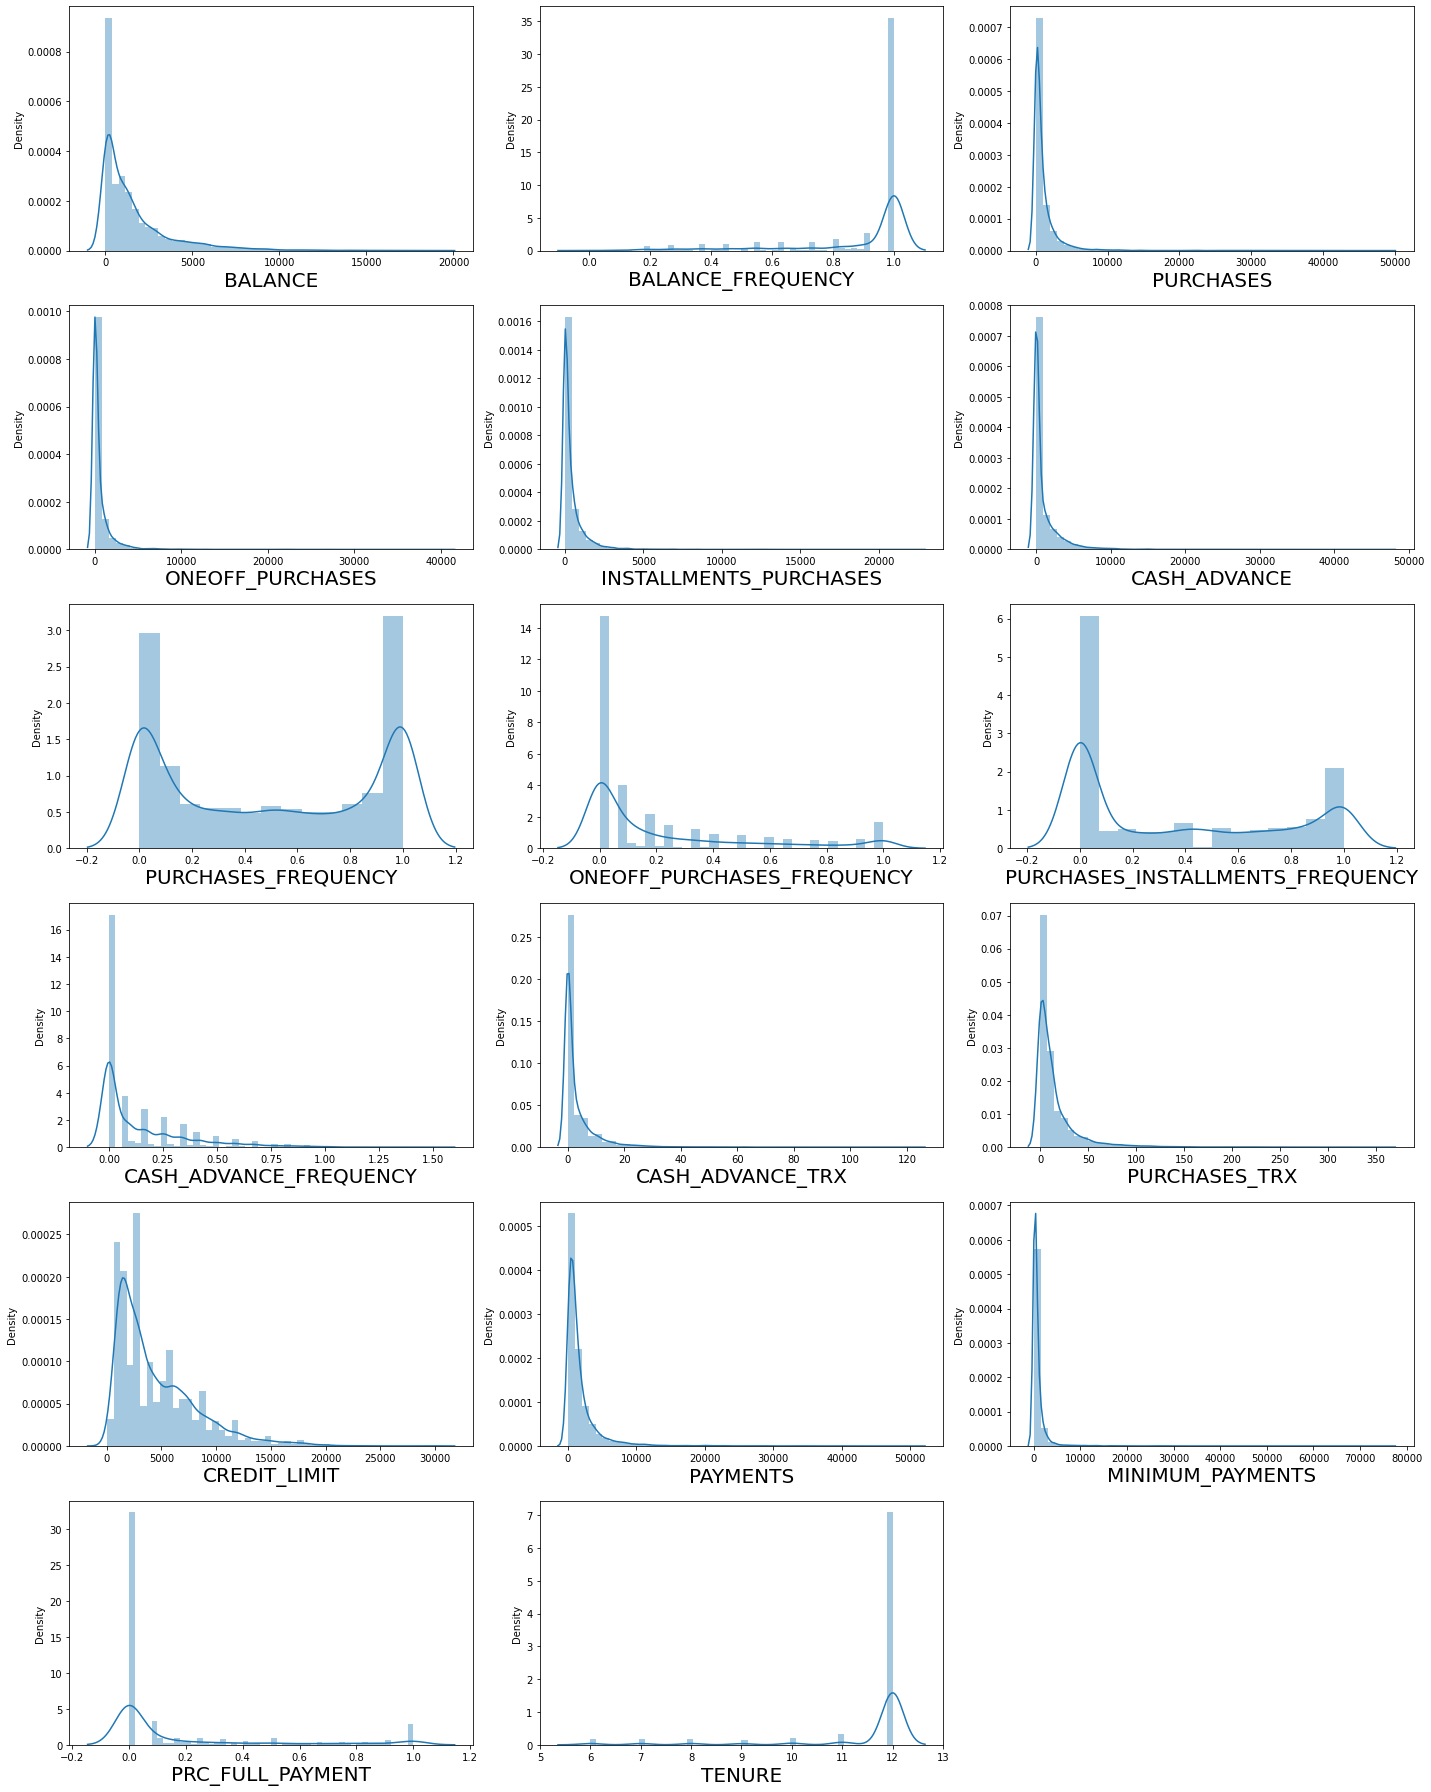

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18 :
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

warnings.filterwarnings("ignore")

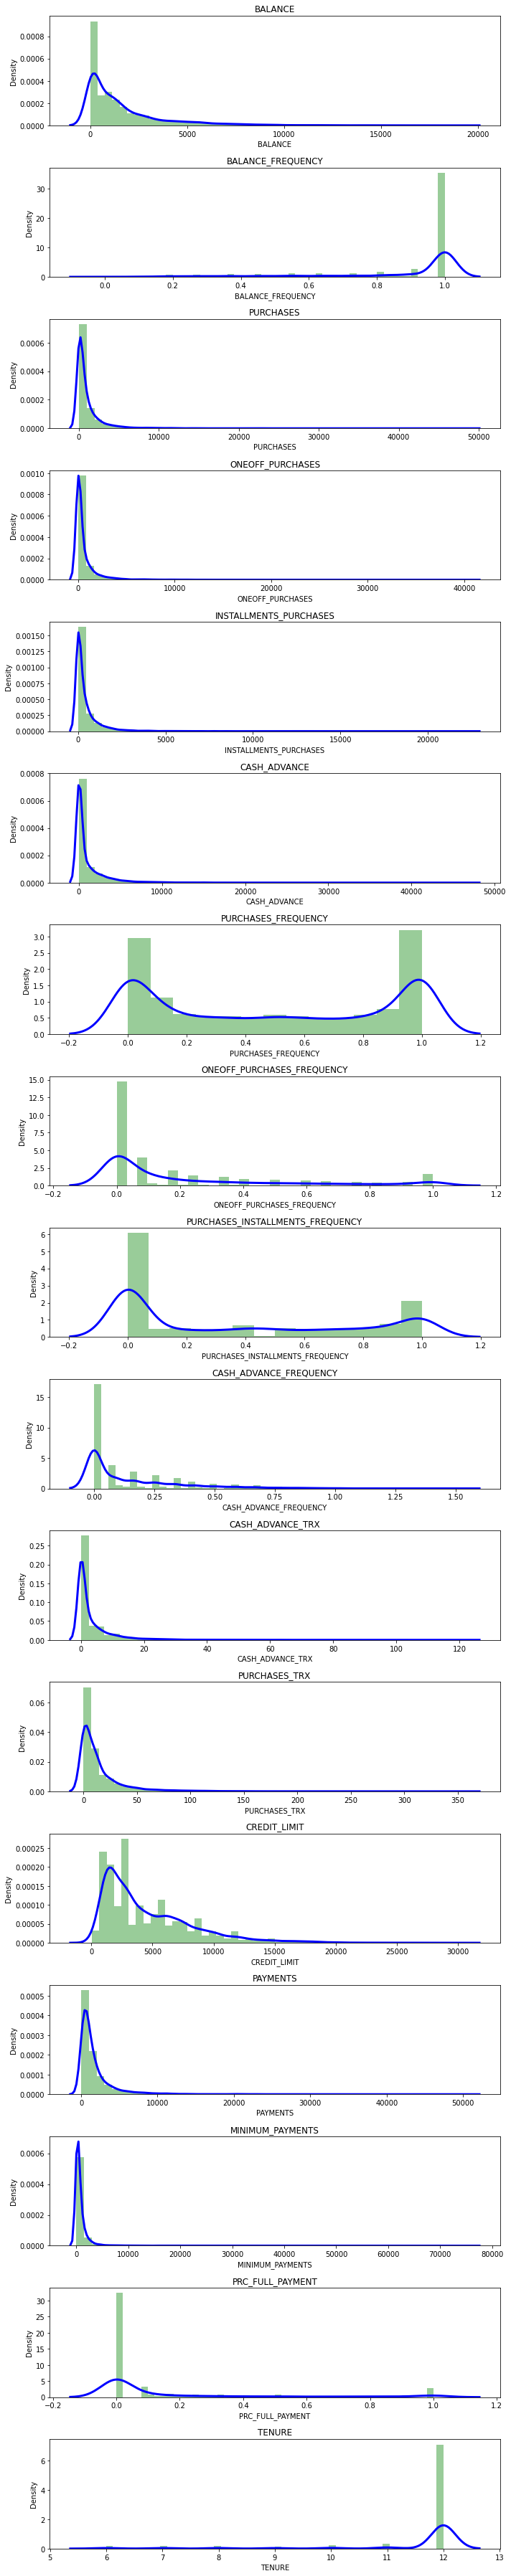

In [15]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

In [16]:
# Descriptive study from the above graphs

 1.  On a average, people have 1600 balance in their accout, but the median being 900 thus it can be concluded that there are many people with higher income.
 2. Most people have their balance updated reguarly.
 3. On an average people make a purpase of 1000 but again the median is approx 375, thus presence of some outliers at the higher end.
 4. There are equal distribution of people in both the groups, who makes frequent purphases and those who do not.
 5. More people prefer not to purchase in installments.
 6. More people do not offer advance cash for their purchases.
 7. Purchase, Oneoff purchase, cash advance, payments, minimum payments all these columns are positively skewed.
 8. Maximum credit cards have a tenure of 12 years.
 9. Maximum credit cards have limit of 4500 per year.
 10. Average payment done by a user is 1700 per year
 11. Minimum payment average is 850 per year

In [17]:
c = df.corr()
c

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


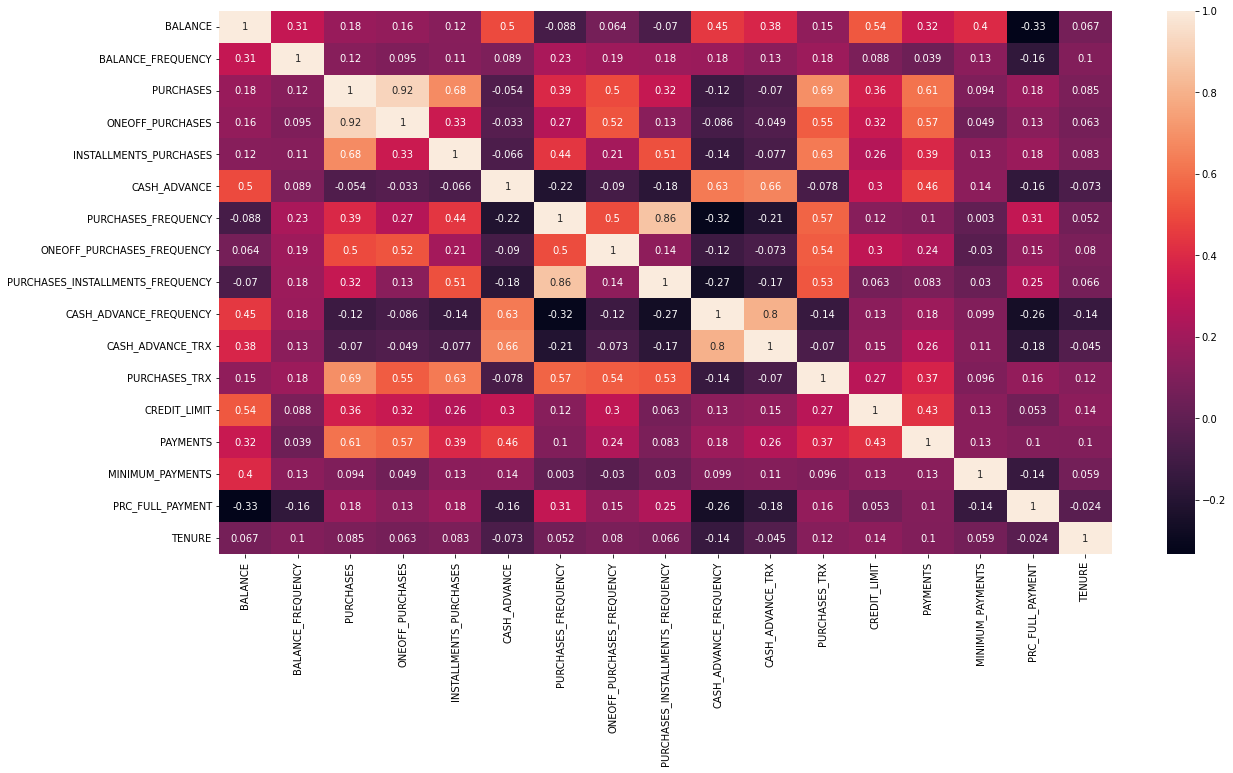

In [18]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(c, annot = True)
plt.show()

1. Purchase is strongly positively correlated with Oneoff Purchase.
2. Purchase installment frequency is highly positively correlated with oneoff purchase frequency.
3. Cash advance transaction is positivelt correlated with cash advance frequency.

In [19]:
# # To check for multicollinearity
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]
print(vif_data)

                             feature           VIF
0                            BALANCE      4.161893
1                  BALANCE_FREQUENCY     23.078996
2                          PURCHASES  58509.808865
3                   ONEOFF_PURCHASES  32612.469018
4             INSTALLMENTS_PURCHASES  10357.268059
5                       CASH_ADVANCE      3.538666
6                PURCHASES_FREQUENCY     26.519081
7         ONEOFF_PURCHASES_FREQUENCY      5.689858
8   PURCHASES_INSTALLMENTS_FREQUENCY     17.209188
9             CASH_ADVANCE_FREQUENCY      4.966228
10                  CASH_ADVANCE_TRX      3.895110
11                     PURCHASES_TRX      4.242576
12                      CREDIT_LIMIT      4.695916
13                          PAYMENTS      3.781687
14                  MINIMUM_PAYMENTS      1.410120
15                  PRC_FULL_PAYMENT      1.737048
16                            TENURE     20.638743


In [20]:
# Scaling
scalar = StandardScaler()
df_scaled = scalar.fit_transform(df)

In [21]:
# To check the vif after scaling
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(df_scaled,i) for i in range(df_scaled.shape[1])]
vif["Features"] = df.columns

#let's check the values
vif

,vif,Features
0,2.659784,BALANCE
1,1.308676,BALANCE_FREQUENCY
2,47806.023856,PURCHASES
3,28887.022524,ONEOFF_PURCHASES
4,8556.156026,INSTALLMENTS_PURCHASES
5,2.929355,CASH_ADVANCE
6,10.665863,PURCHASES_FREQUENCY
7,3.916285,ONEOFF_PURCHASES_FREQUENCY
8,9.357184,PURCHASES_INSTALLMENTS_FREQUENCY
9,3.521762,CASH_ADVANCE_FREQUENCY


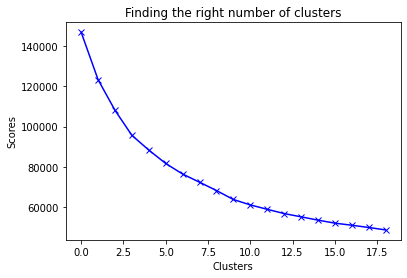

In [22]:
# To find the optimum number of clusters
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()


In [23]:
# Lets choose the number of clusters to be 10 from the above diagram
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [24]:
kmeans.cluster_centers_.shape

(8, 17)

In [25]:
labels.max()

7

In [26]:
labels.min()

0

In [27]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,5.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0


In [28]:
df_cluster.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,5.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,6.0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0,1.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0,5.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0,0.0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0,1.0


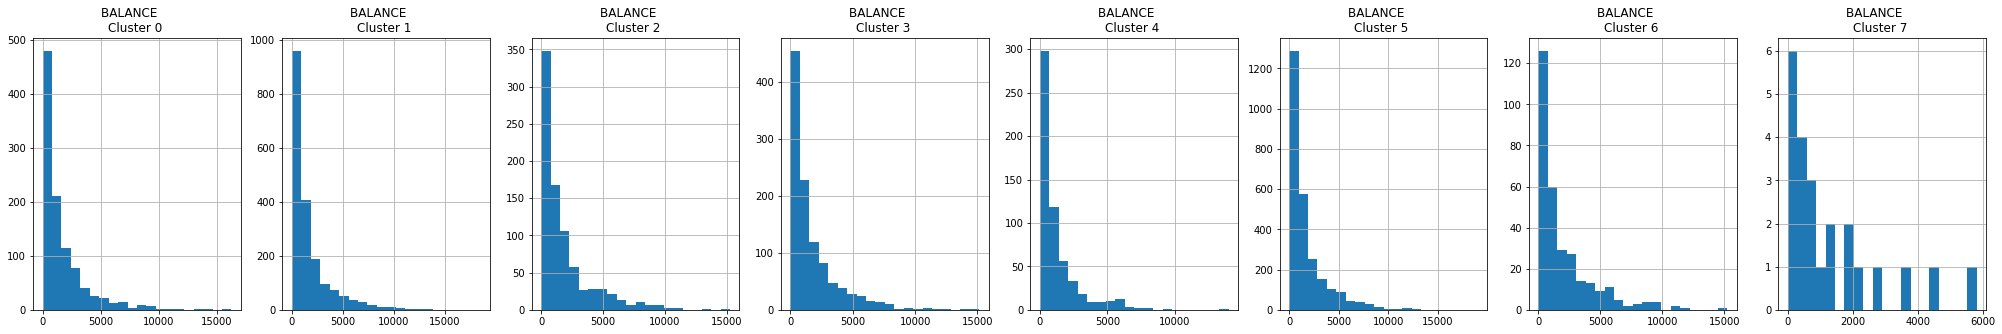

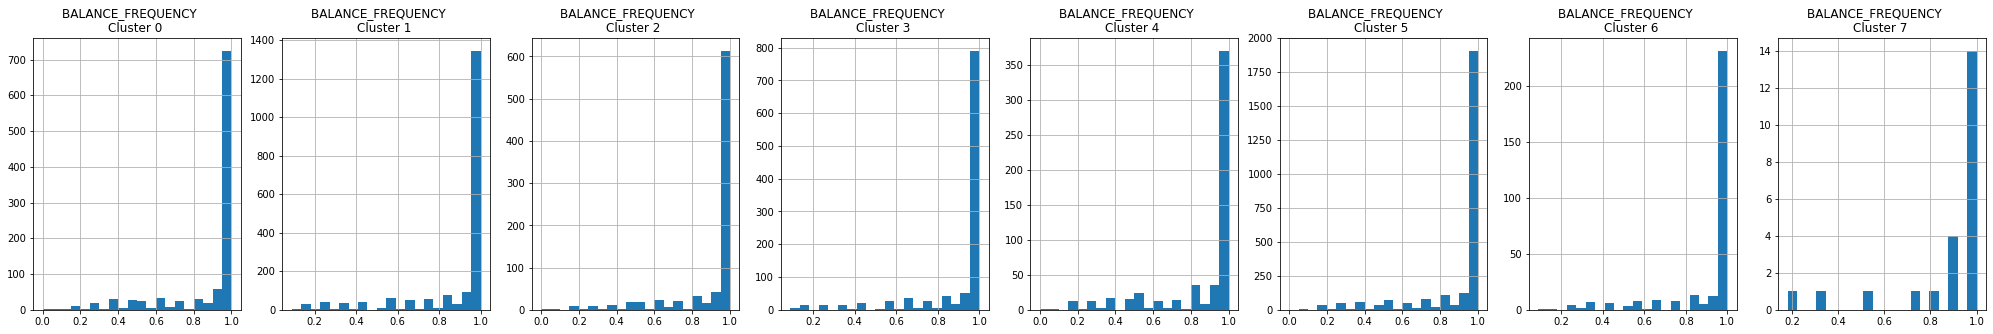

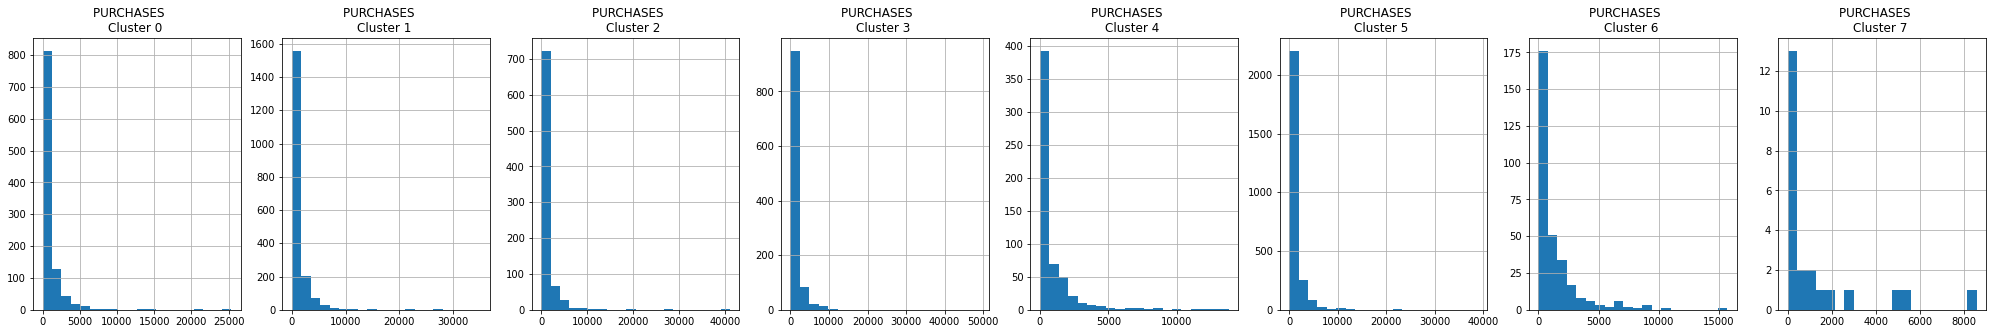

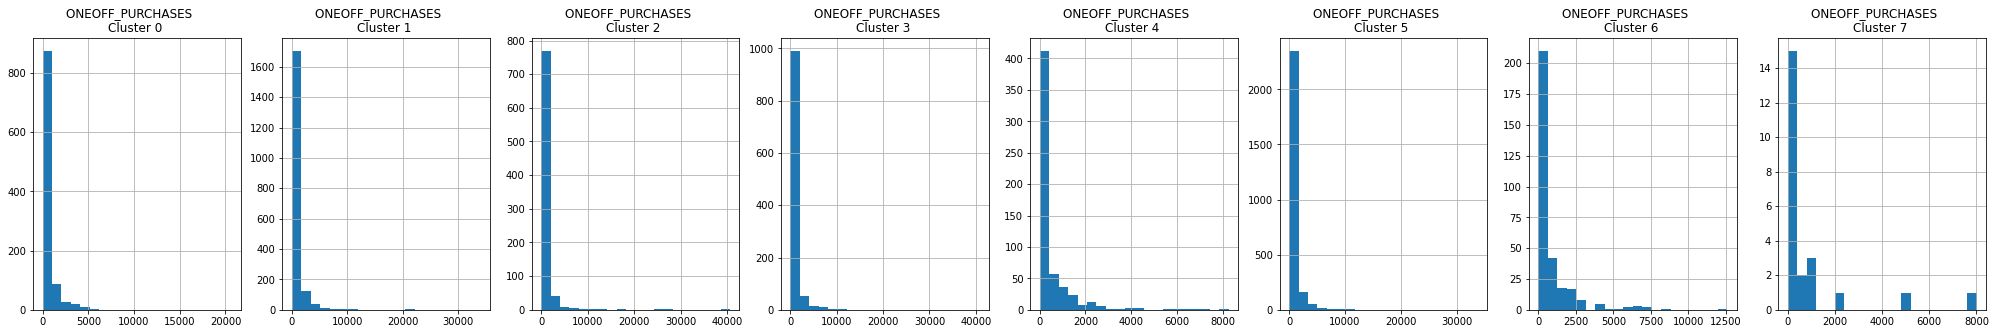

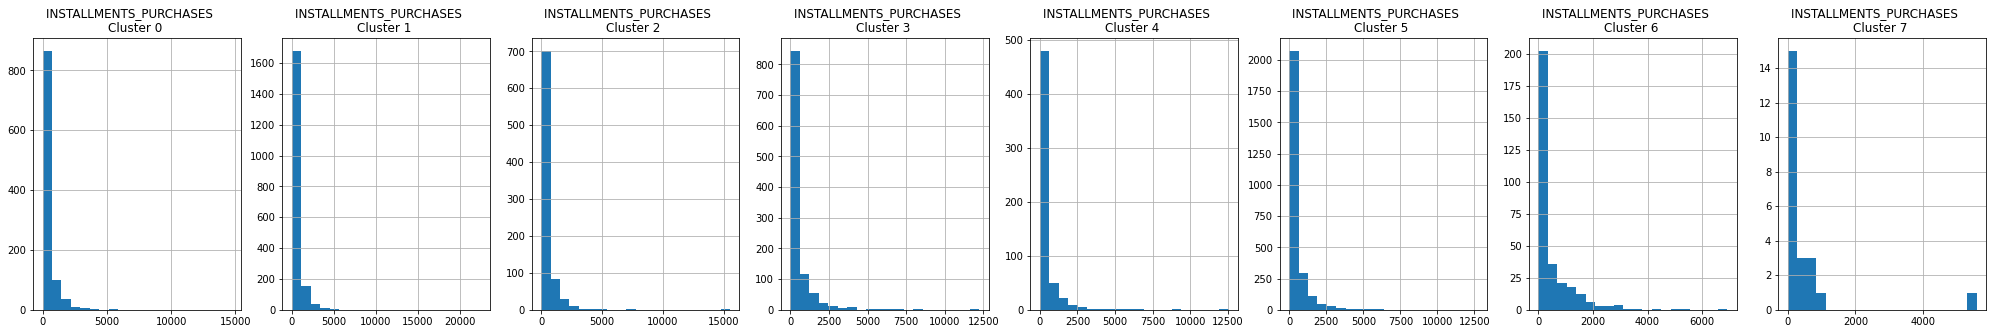

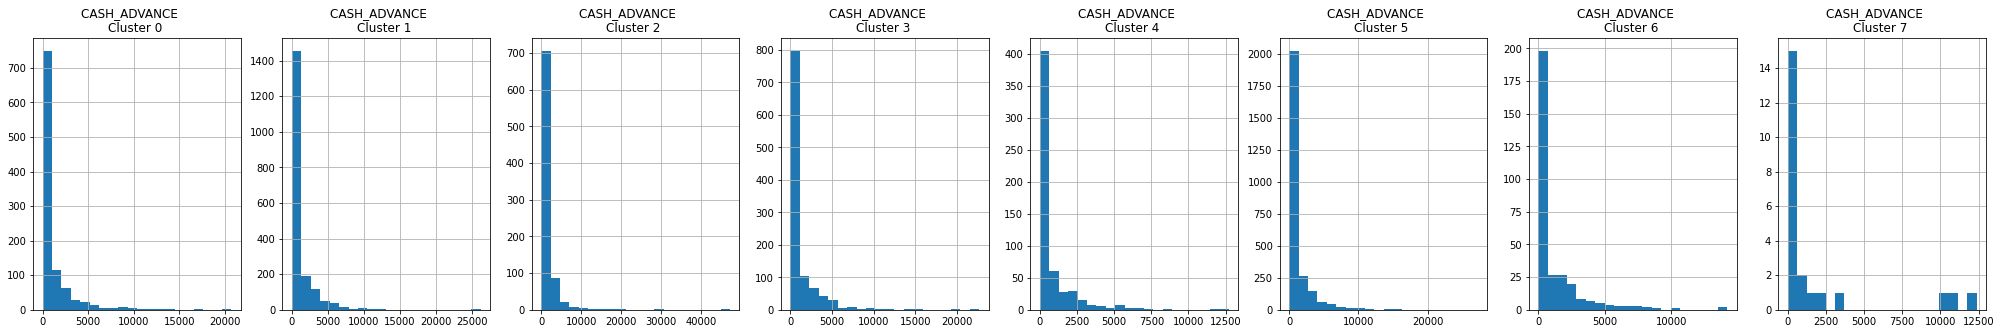

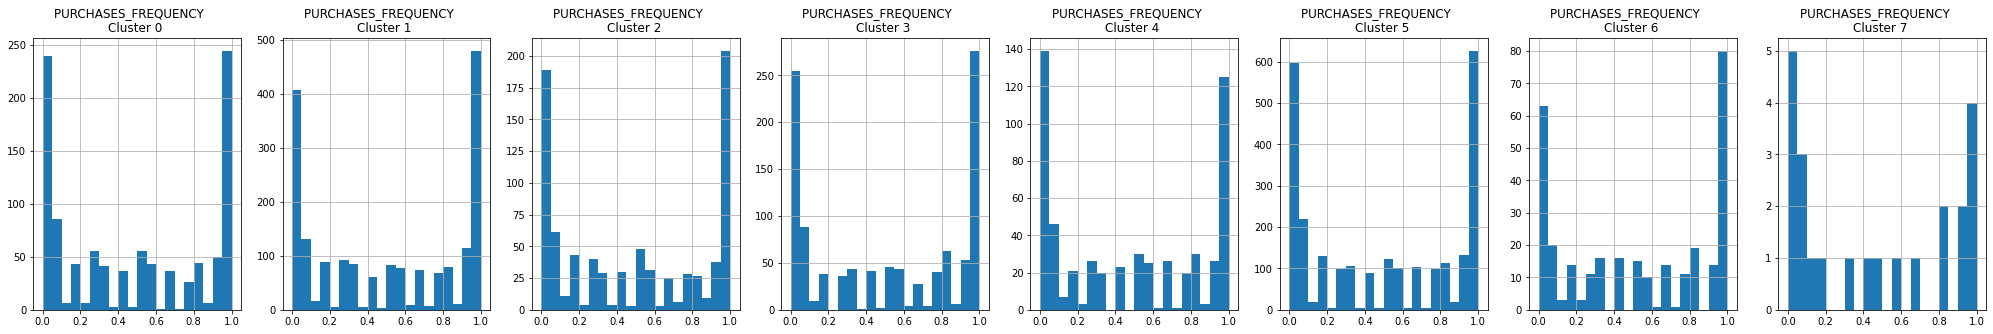

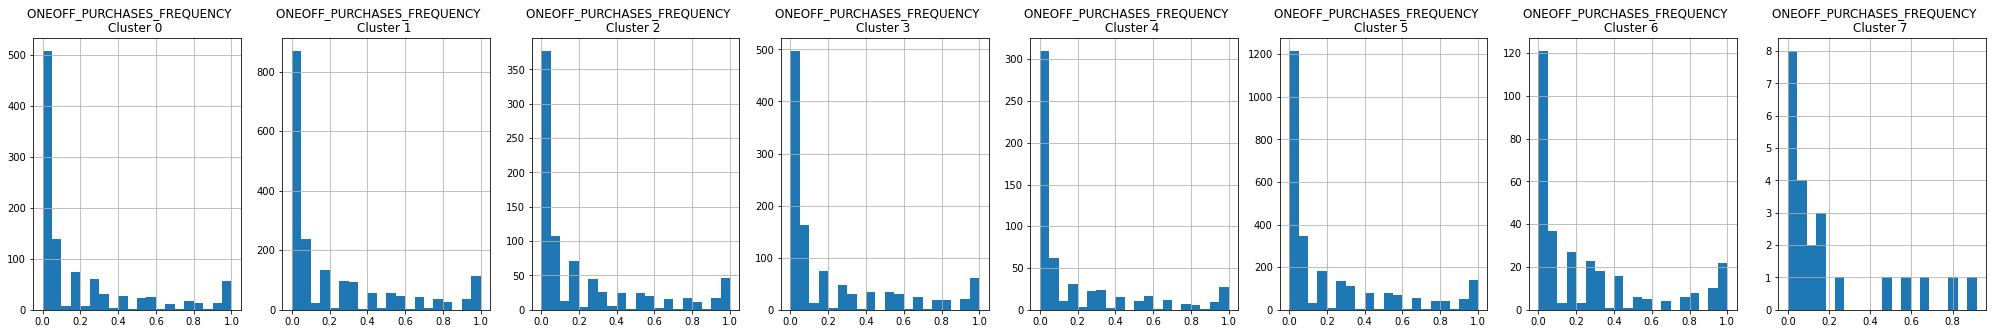

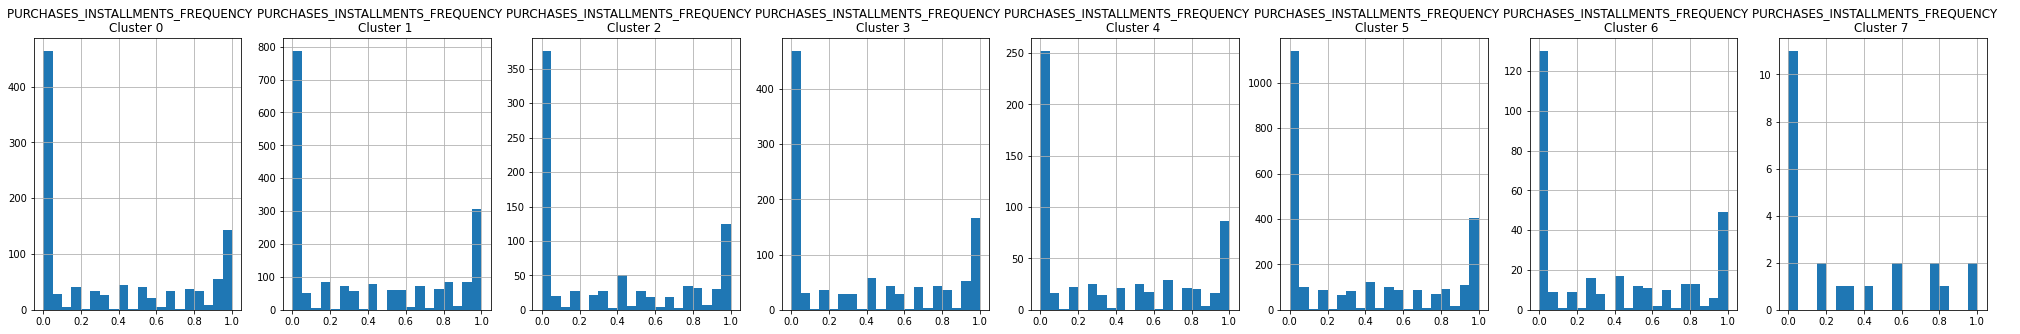

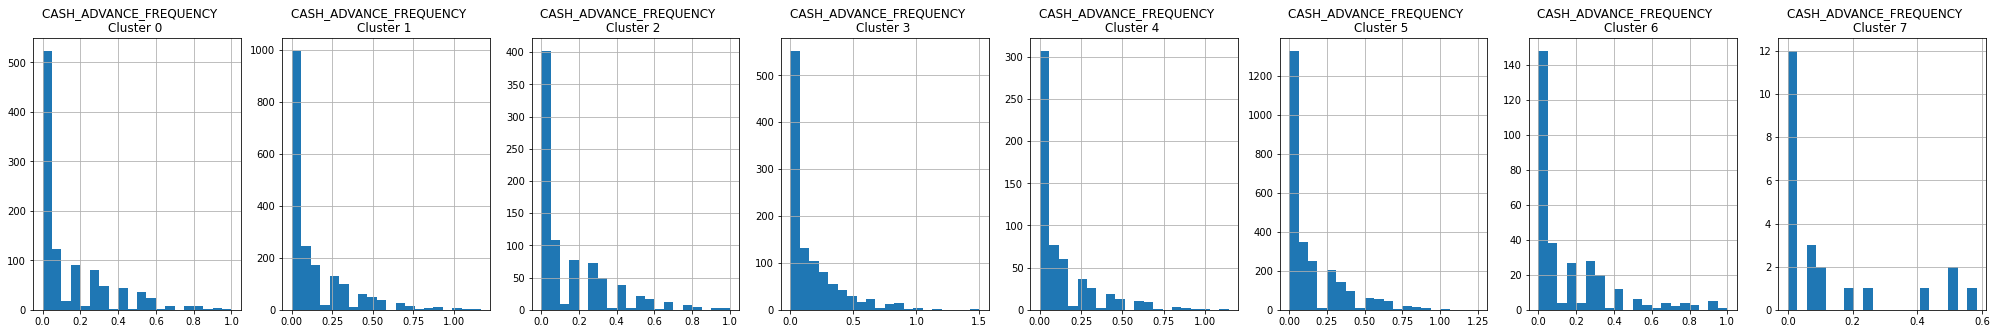

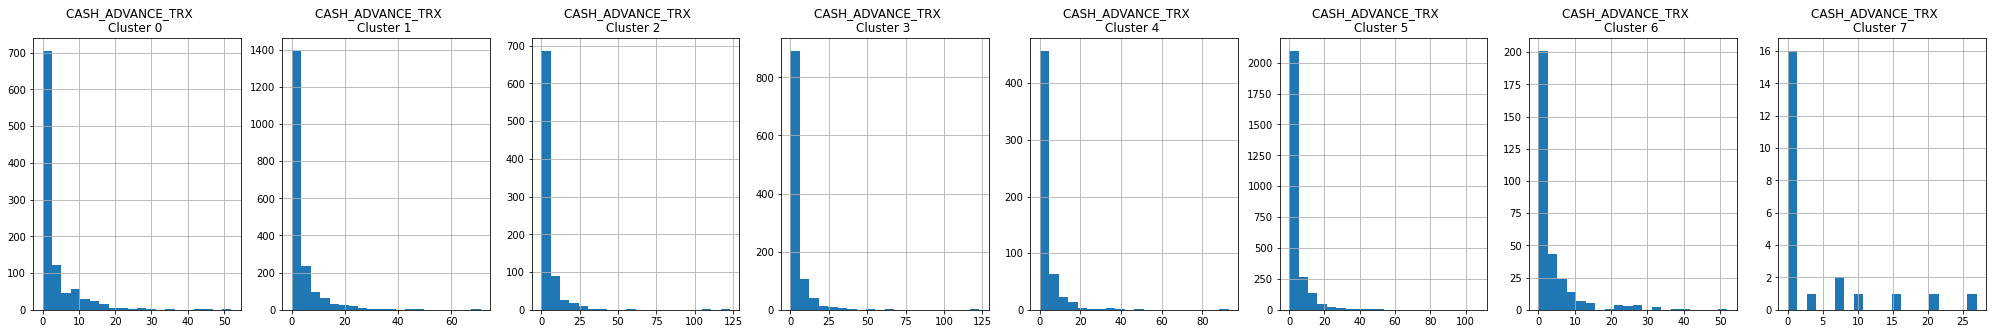

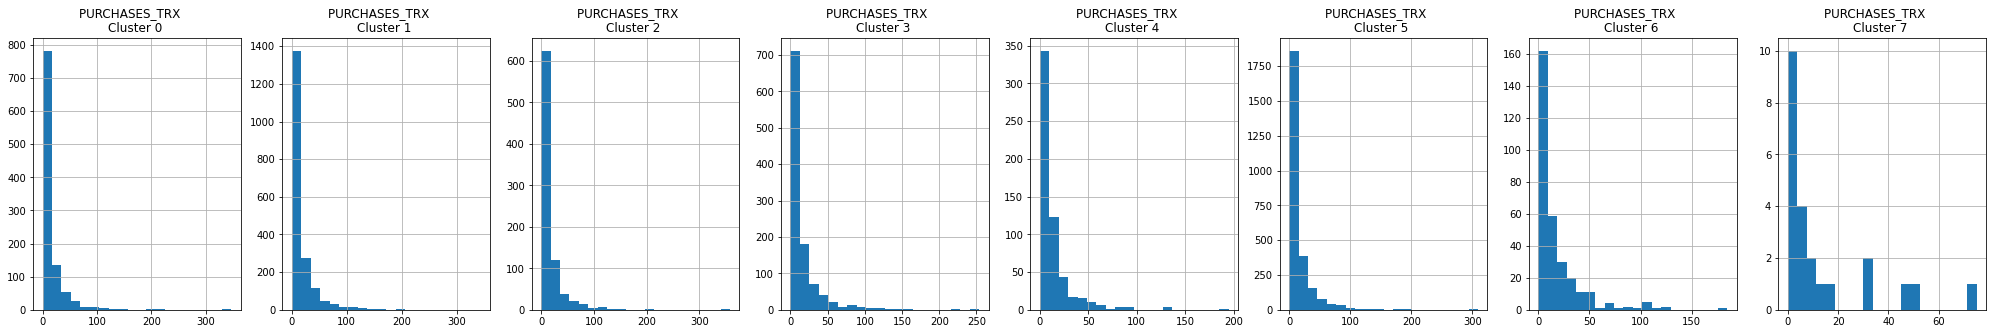

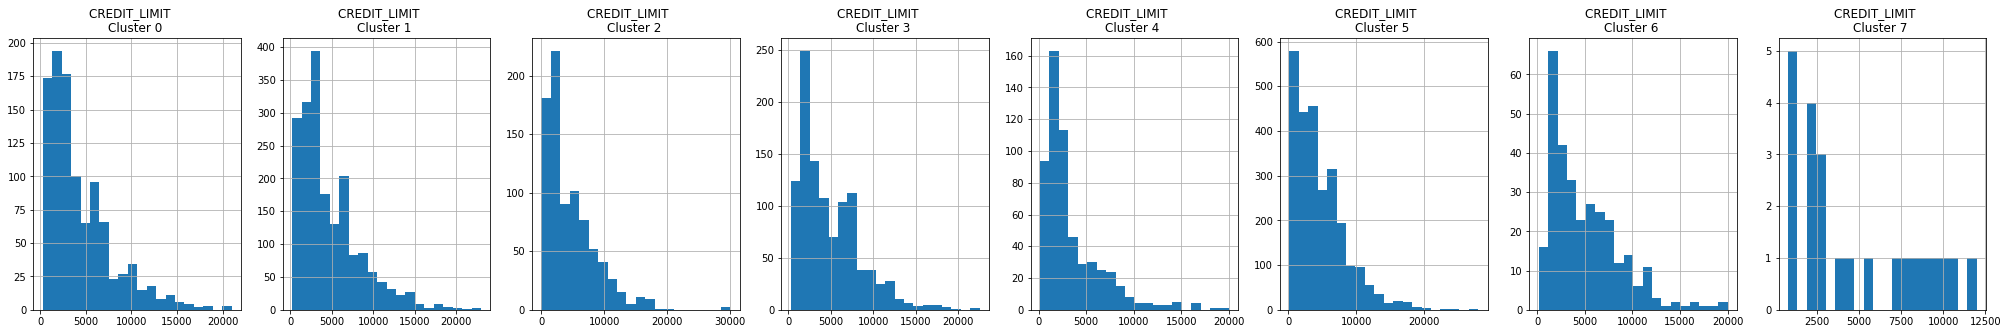

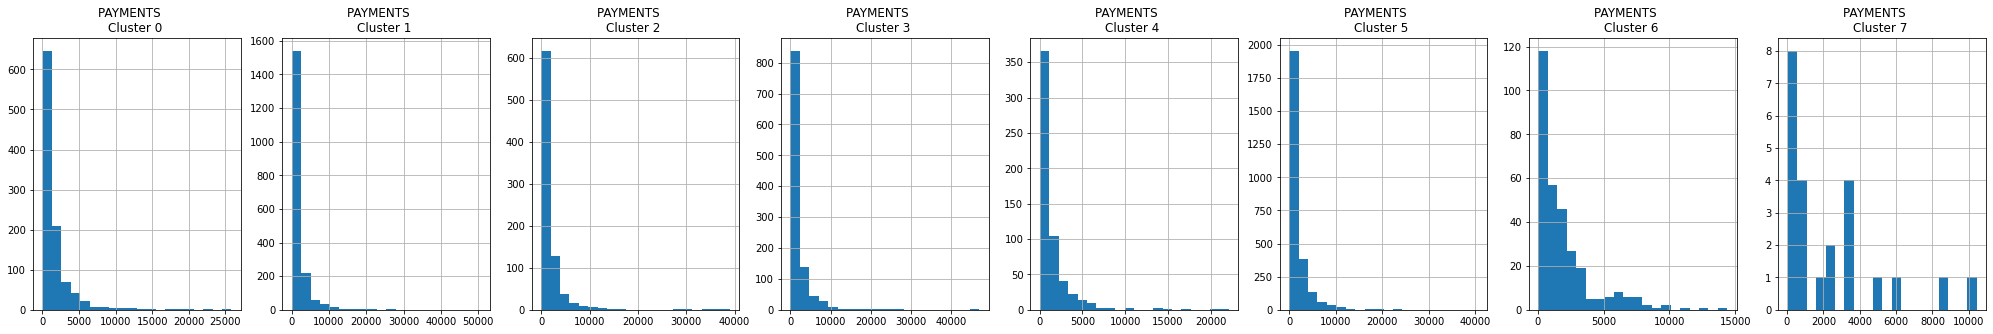

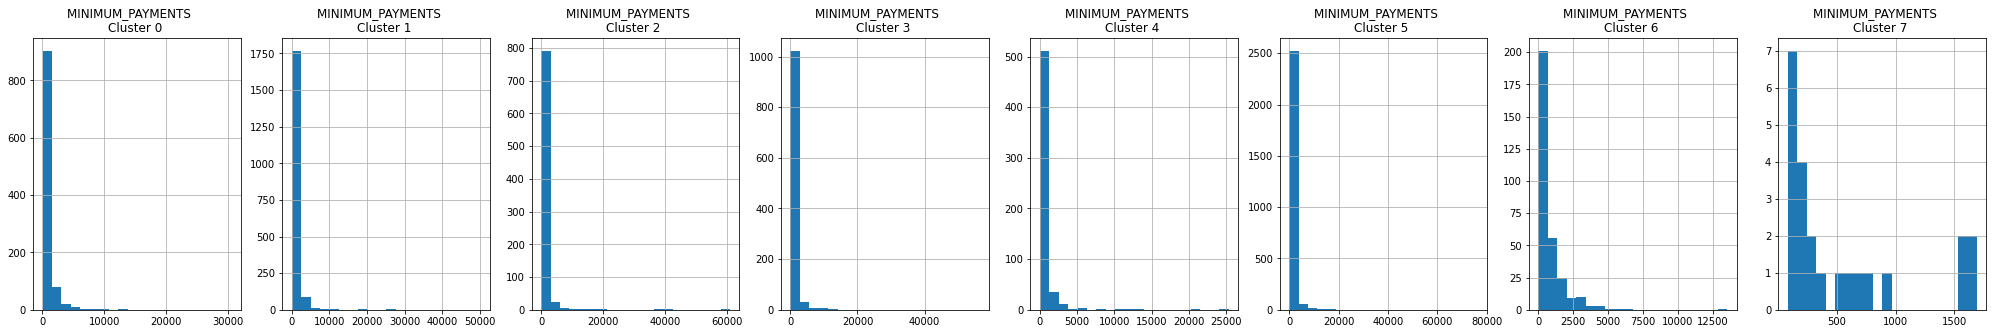

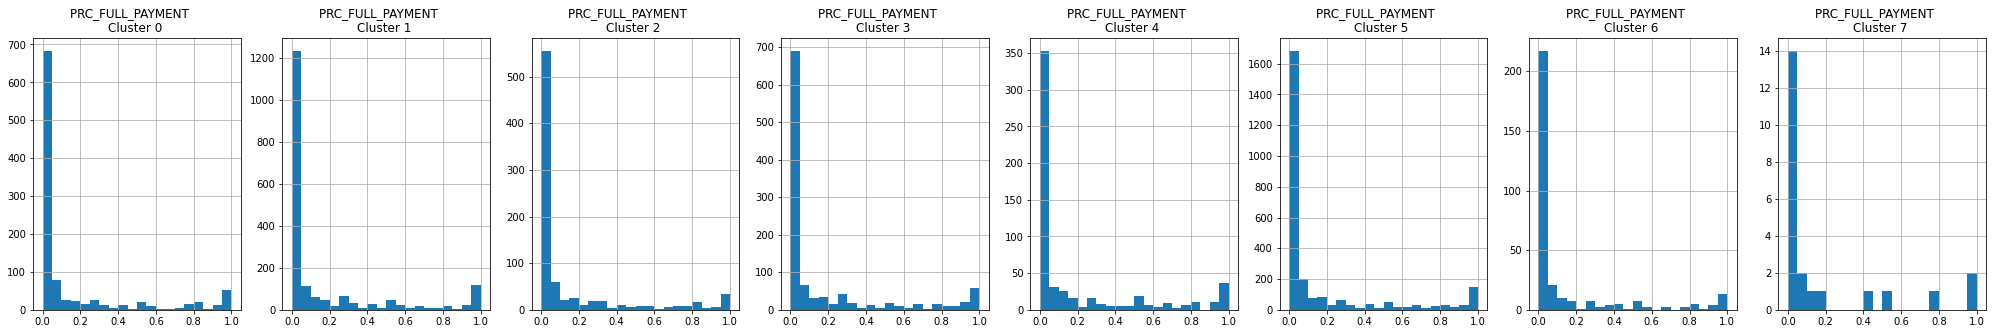

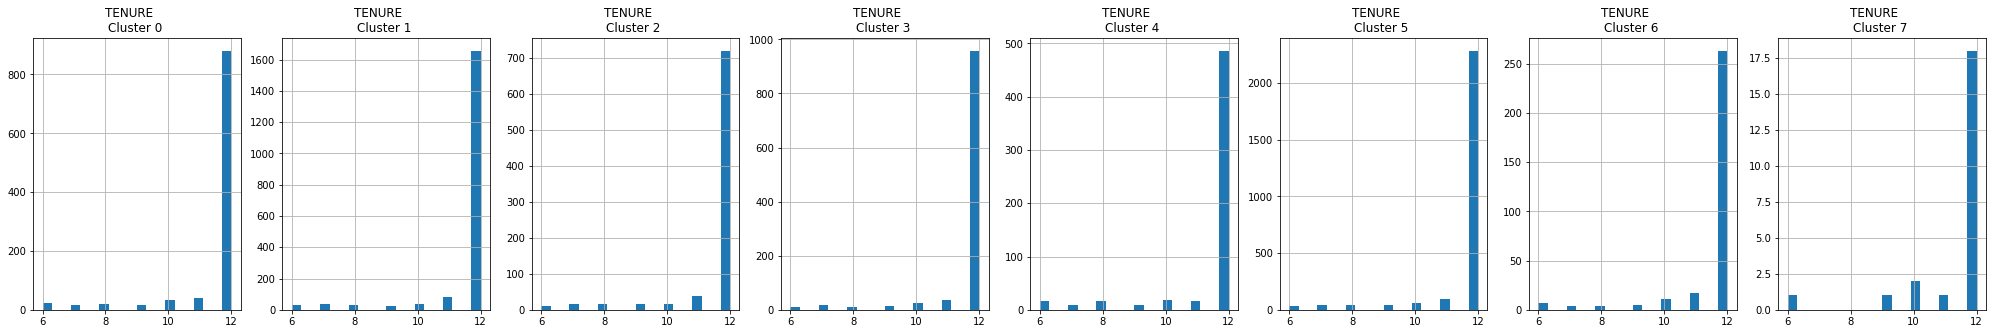

In [29]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [30]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers   

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.700939,-2.245460,-0.302499,-0.228529,-0.295087,-0.316788,-0.557847,-0.424299,-0.459552,-0.515790,-0.374528,-0.418148,-0.169467,-0.159248,-0.295939,0.405168,0.211345
1,-0.368974,0.321745,-0.037111,-0.243677,0.359931,-0.365611,0.988234,-0.387034,1.201717,-0.479148,-0.363830,0.185238,-0.268120,-0.228492,-0.031211,0.290392,0.256626
2,1.656233,0.372390,-0.227638,-0.162881,-0.238942,1.974392,-0.492191,-0.221416,-0.430187,1.885648,1.899995,-0.279192,1.010211,0.780980,0.520401,-0.411528,0.070661
3,-0.131089,0.380410,0.569181,0.692996,0.071898,-0.332928,0.988009,1.892684,0.214522,-0.421377,-0.335549,0.653988,0.465171,0.166717,-0.153257,0.451183,0.266737
4,-0.328299,-0.322744,-0.289840,-0.219036,-0.282360,0.083904,-0.176539,-0.291812,-0.201439,0.327373,-0.002332,-0.386447,-0.562147,-0.382089,-0.218257,0.021386,-3.245997
5,-0.005114,0.391284,-0.359671,-0.243435,-0.402895,-0.108633,-0.853883,-0.391774,-0.759354,0.085567,-0.041233,-0.482898,-0.315024,-0.262589,-0.011442,-0.466285,0.266966
6,1.081873,0.456178,2.539355,1.812385,2.673222,-0.151312,1.154758,1.538915,1.275954,-0.283254,-0.140062,3.193004,1.326220,1.486747,0.719375,0.225371,0.329040
7,1.815412,0.302956,12.114048,12.630371,5.427890,0.262195,1.029354,2.121252,0.884299,-0.389417,-0.117753,4.484890,3.159648,8.984322,1.012619,1.187840,0.291611


In [31]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,132.442387,0.428687,369.923902,220.010375,150.191951,322.161590,0.272164,0.078604,0.185887,0.033528,0.725141,4.504690,3902.006984,1321.124753,162.209981,0.279336,11.811445
1,828.057807,0.961857,945.014003,194.498952,750.969415,218.591169,0.892528,0.089785,0.847188,0.040922,0.799084,19.697355,3541.032656,1119.646987,790.258444,0.245333,11.870804
2,5071.779131,0.972375,532.146005,330.576039,201.687367,5182.522252,0.298509,0.139476,0.197576,0.518090,16.446882,8.003464,8218.480999,4056.850744,2098.918561,0.037387,11.627021
3,1326.535033,0.974040,2258.840082,1772.051911,486.788170,287.923264,0.892438,0.773783,0.454215,0.052579,0.994565,31.500000,6224.164196,2269.563428,500.714296,0.292968,11.884058
4,913.290403,0.828006,397.355601,235.998308,161.864907,1172.163235,0.425164,0.118355,0.288634,0.203661,3.297800,5.302876,2465.177665,672.736076,346.504670,0.165639,7.279188
5,1590.508228,0.976299,246.034007,194.906327,51.311105,763.729256,0.153380,0.088362,0.066544,0.154870,3.028910,2.874351,3369.409439,1020.438650,837.159266,0.021165,11.884359
6,3868.236032,0.989776,6528.171340,3657.339315,2872.701184,673.192153,0.959346,0.667639,0.876739,0.080449,2.345794,95.429907,9374.766355,6110.378217,2570.970176,0.226071,11.965732
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


Thus using the above histogram and table, we can make divide the customers into various groups and accordingly give them offers as per their requirements.

### Applying Principal Component Analysis

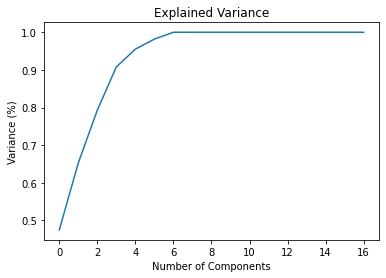

In [32]:
# Choosing the number of componentns to be used
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [36]:
# With 3 components we can reach 90% of variance in our dataset,but we will take 2 for easy visualisation 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.69639776, -1.12258467],
       [-1.215686  ,  2.4356486 ],
       [ 0.93585738, -0.38519196],
       ...,
       [-0.93002756, -1.84124252],
       [-2.35601119, -0.71873965],
       [-0.59681316, -0.4460173 ]])

In [37]:
# Create a dataframe with the three components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.696398,-1.122585
1,-1.215686,2.435649
2,0.935857,-0.385192
3,-1.614640,-0.724587
4,0.223703,-0.783601


In [38]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.696398,-1.122585,5
1,-1.215686,2.435649,2
2,0.935857,-0.385192,3
3,-1.614640,-0.724587,5
4,0.223703,-0.783601,1


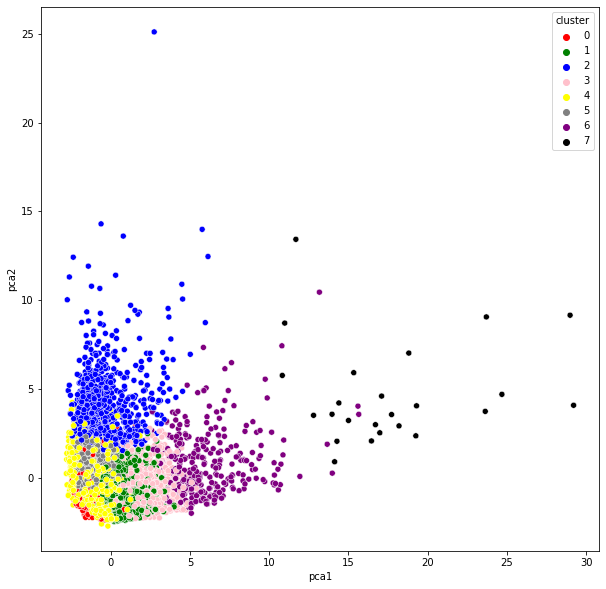

In [39]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()